In [563]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from scipy import stats
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [564]:
df = pd.read_csv('players_20.csv')
df.head(3)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [565]:
df.shape

(18278, 104)

In [566]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [567]:
features = ['value_eur','height_cm','weight_kg','overall','potential','wage_eur','preferred_foot','age','international_reputation','shooting','passing','dribbling','physic']
data = df.copy()
data = data[features]

In [568]:
data.head(3)

,value_eur,height_cm,weight_kg,overall,potential,wage_eur,preferred_foot,age,international_reputation,shooting,passing,dribbling,physic
0,95500000,170,72,94,94,565000,Left,32,5,92.0,92.0,96.0,66.0
1,58500000,187,83,93,93,405000,Right,34,5,93.0,82.0,89.0,78.0
2,105500000,175,68,92,92,290000,Right,27,5,85.0,87.0,95.0,58.0


In [569]:
data_clean = data.copy()
data_clean

,value_eur,height_cm,weight_kg,overall,potential,wage_eur,preferred_foot,age,international_reputation,shooting,passing,dribbling,physic
0,95500000,170,72,94,94,565000,Left,32,5,92.0,92.0,96.0,66.0
1,58500000,187,83,93,93,405000,Right,34,5,93.0,82.0,89.0,78.0
2,105500000,175,68,92,92,290000,Right,27,5,85.0,87.0,95.0,58.0
3,77500000,188,87,91,93,125000,Right,26,3,NaN,NaN,NaN,NaN
4,90000000,175,74,91,91,470000,Right,28,4,83.0,86.0,94.0,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,40000,186,79,48,56,2000,Right,22,1,23.0,28.0,33.0,51.0
18274,40000,177,66,48,56,2000,Right,22,1,24.0,33.0,35.0,48.0
18275,40000,186,75,48,56,1000,Right,19,1,35.0,44.0,45.0,51.0
18276,40000,185,74,48,54,1000,Right,18,1,35.0,47.0,47.0,52.0


In [570]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   value_eur                 18278 non-null  int64  
 1   height_cm                 18278 non-null  int64  
 2   weight_kg                 18278 non-null  int64  
 3   overall                   18278 non-null  int64  
 4   potential                 18278 non-null  int64  
 5   wage_eur                  18278 non-null  int64  
 6   preferred_foot            18278 non-null  object 
 7   age                       18278 non-null  int64  
 8   international_reputation  18278 non-null  int64  
 9   shooting                  16242 non-null  float64
 10  passing                   16242 non-null  float64
 11  dribbling                 16242 non-null  float64
 12  physic                    16242 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.8+ MB


In [571]:
data_clean.isnull().sum()

value_eur                      0
height_cm                      0
weight_kg                      0
overall                        0
potential                      0
wage_eur                       0
preferred_foot                 0
age                            0
international_reputation       0
shooting                    2036
passing                     2036
dribbling                   2036
physic                      2036
dtype: int64

Imputaremos el promedio de shooting

In [572]:
promedio_shotting = data_clean['shooting'].mean()
data_clean["shooting"] = data_clean["shooting"].fillna(promedio_shotting)

Imputaremos el promedio de passing

In [573]:
promedio_passing = data_clean["passing"].mean()
data_clean["passing"] = data_clean["passing"].fillna(promedio_passing)

Imputaremos el promedio de dribbling

In [574]:
promedio_dribbling = data_clean["dribbling"].mean()
data_clean["dribbling"] = data_clean["dribbling"].fillna(promedio_dribbling)

Imputaremos el promedio de physic

In [575]:
promedio_physic = data_clean["physic"].mean()
data_clean["physic"] = data_clean["physic"].fillna(promedio_physic)

In [576]:
data_clean.isnull().sum()

value_eur                   0
height_cm                   0
weight_kg                   0
overall                     0
potential                   0
wage_eur                    0
preferred_foot              0
age                         0
international_reputation    0
shooting                    0
passing                     0
dribbling                   0
physic                      0
dtype: int64

In [577]:
data_clean.head(3)

,value_eur,height_cm,weight_kg,overall,potential,wage_eur,preferred_foot,age,international_reputation,shooting,passing,dribbling,physic
0,95500000,170,72,94,94,565000,Left,32,5,92.0,92.0,96.0,66.0
1,58500000,187,83,93,93,405000,Right,34,5,93.0,82.0,89.0,78.0
2,105500000,175,68,92,92,290000,Right,27,5,85.0,87.0,95.0,58.0


Crearemos dummies para preferred_foot

In [578]:
pf_foot_dummies = pd.get_dummies(data_clean["preferred_foot"],drop_first=True).astype(int)
pf_foot_dummies.head(3)

,Right
0,0
1,1
2,1


Añadiremos ese dummy a nuestro df y eliminaremos la antigua columna preferred_foot

In [579]:
data_clean = pd.concat([data_clean,pf_foot_dummies],axis=1)
data_clean.drop(["preferred_foot"],axis=1,inplace=True)

data_clean.head(3)


,value_eur,height_cm,weight_kg,overall,potential,wage_eur,age,international_reputation,shooting,passing,dribbling,physic,Right
0,95500000,170,72,94,94,565000,32,5,92.0,92.0,96.0,66.0,0
1,58500000,187,83,93,93,405000,34,5,93.0,82.0,89.0,78.0,1
2,105500000,175,68,92,92,290000,27,5,85.0,87.0,95.0,58.0,1


In [580]:
data_clean.columns

Index(['value_eur', 'height_cm', 'weight_kg', 'overall', 'potential',
       'wage_eur', 'age', 'international_reputation', 'shooting', 'passing',
       'dribbling', 'physic', 'Right'],
      dtype='object')

In [581]:
data_clean.describe()

,value_eur,height_cm,weight_kg,overall,potential,wage_eur,age,international_reputation,shooting,passing,dribbling,physic,Right
count,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,2.484038e+06,181.362184,75.276343,66.244994,71.546887,9456.942773,25.283291,1.103184,52.298301,57.233777,62.531585,64.876678,0.763760
std,5.585481e+06,6.756961,7.047744,6.949953,6.139669,21351.714095,4.656964,0.378861,13.224936,9.811032,9.695186,9.200490,0.424783
min,0.000000e+00,156.000000,50.000000,48.000000,49.000000,0.000000,16.000000,1.000000,15.000000,24.000000,23.000000,27.000000,0.000000
25%,3.250000e+05,177.000000,70.000000,62.000000,67.000000,1000.000000,22.000000,1.000000,44.000000,52.000000,58.000000,60.000000,1.000000
50%,7.000000e+05,181.000000,75.000000,66.000000,71.000000,3000.000000,25.000000,1.000000,52.298301,57.233777,62.531585,64.876678,1.000000
75%,2.100000e+06,186.000000,80.000000,71.000000,75.000000,8000.000000,29.000000,1.000000,62.000000,63.000000,69.000000,71.000000,1.000000
max,1.055000e+08,205.000000,110.000000,94.000000,95.000000,565000.000000,42.000000,5.000000,93.000000,92.000000,96.000000,90.000000,1.000000


Distribución de edades

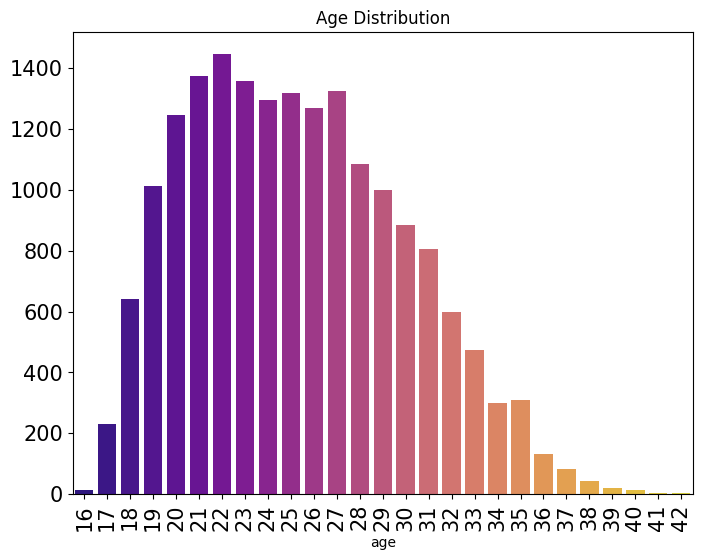

In [630]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data_clean.age.value_counts().index, y=data_clean.age.value_counts().values,palette="plasma",capsize=.2)

plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=15)
plt.title('Age Distribution')
plt.show()

Text(0.5, 1.0, 'Potential Distribution')

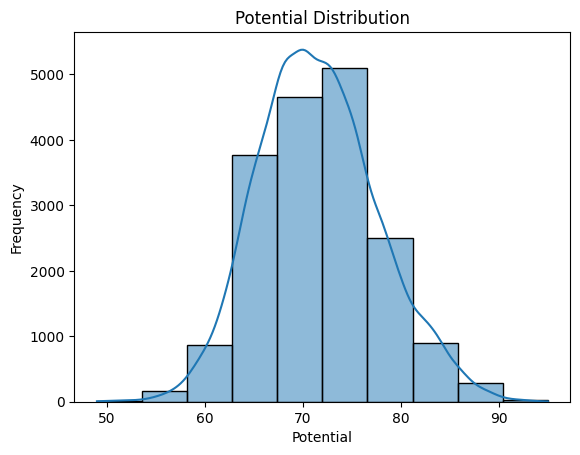

In [637]:
sns.histplot(data=data_clean,x="potential",bins=10,kde=True)
plt.xlabel("Potential")
plt.ylabel("Frequency")
plt.title("Potential Distribution")

<AxesSubplot: ylabel='age'>

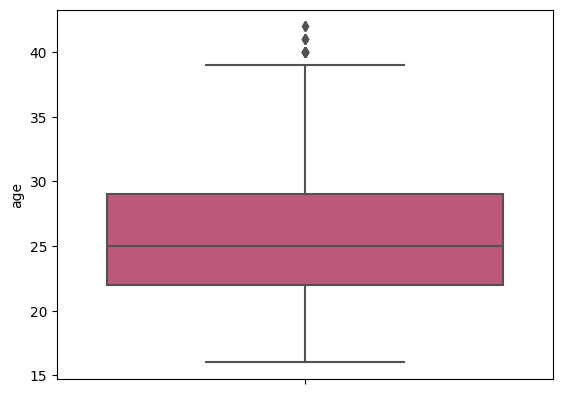

In [644]:
sns.boxplot(data=data_clean,y="age",palette="plasma")

In [582]:
X = data_clean.drop(["value_eur"],axis=1)
y = data_clean["value_eur"]


In [583]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [584]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression()

In [585]:

predicciones = modelo.predict(X_test)

In [586]:
from sklearn.metrics import r2_score
r2_score(y_test, predicciones)

0.8220942895510209

In [587]:
data_clean['intercept']=1

lm = sm.OLS(y,X).fit() # fitting the model
print(lm.summary2())

                             Results: Ordinary least squares
Model:                     OLS                 Adj. R-squared (uncentered):    0.828      
Dependent Variable:        value_eur           AIC:                            590914.7711
Date:                      2023-11-16 20:39    BIC:                            591008.5326
No. Observations:          18278               Log-Likelihood:                 -2.9545e+05
Df Model:                  12                  F-statistic:                    7340.      
Df Residuals:              18266               Prob (F-statistic):             0.00       
R-squared (uncentered):    0.828               Scale:                          6.4220e+12 
------------------------------------------------------------------------------------------
                            Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
------------------------------------------------------------------------------------------
height_cm                 -49

Notamos que las features passing, physic, Right superan el P valor de 0.05 , por lo que podrían no ser muy significativas.
Reentrenaremos el modelo sin estos features

In [588]:
no_significativas = ["passing","physic","Right"]
data_clean_sig = data_clean.drop(no_significativas,axis=1)
data_clean_sig.columns

Index(['value_eur', 'height_cm', 'weight_kg', 'overall', 'potential',
       'wage_eur', 'age', 'international_reputation', 'shooting', 'dribbling',
       'intercept'],
      dtype='object')

In [589]:
n_modelo = LinearRegression()
new_X = data_clean_sig.drop(["value_eur","intercept"],axis=1)
new_y = data_clean_sig["value_eur"]
X_train, X_test, y_train, y_test = train_test_split(new_X,new_y,test_size=0.20,random_state=1)
n_modelo.fit(X_train,y_train)

LinearRegression()

In [590]:

n_predicciones = n_modelo.predict(X_test)

In [591]:
r2_score(y_test, n_predicciones)

0.8220995893353711

In [592]:
data_clean_sig['intercept']=1

lm = sm.OLS(new_y,new_X).fit() # fitting the model
print(lm.summary2())

                             Results: Ordinary least squares
Model:                     OLS                 Adj. R-squared (uncentered):    0.828      
Dependent Variable:        value_eur           AIC:                            590912.4089
Date:                      2023-11-16 20:39    BIC:                            590982.7300
No. Observations:          18278               Log-Likelihood:                 -2.9545e+05
Df Model:                  9                   F-statistic:                    9786.      
Df Residuals:              18269               Prob (F-statistic):             0.00       
R-squared (uncentered):    0.828               Scale:                          6.4223e+12 
------------------------------------------------------------------------------------------
                            Coef.      Std.Err.     t     P>|t|     [0.025       0.975]   
------------------------------------------------------------------------------------------
height_cm                 -49

In [593]:
data_clean_sig.head(3)

,value_eur,height_cm,weight_kg,overall,potential,wage_eur,age,international_reputation,shooting,dribbling,intercept
0,95500000,170,72,94,94,565000,32,5,92.0,96.0,1
1,58500000,187,83,93,93,405000,34,5,93.0,89.0,1
2,105500000,175,68,92,92,290000,27,5,85.0,95.0,1


In [626]:
valores = {"height_cm":170,"weight_kg":72,"overall":94,
           "potential":94,"wage_eur":565000,"age":32,
           "international_reputation":5,"shooting":92,"dribbling":96}

valores = pd.DataFrame(valores,index=[0])
number = n_modelo.predict(valores)
print("Número en formato científico: {:.2e}".format(number[0]))

Número en formato científico: 1.07e+08
